In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [237]:
X_traindf = pd.read_csv('train\X_train.txt', delim_whitespace=True, header = None)
Y_traindf = pd.read_csv('train\y_train.txt', header = None, delim_whitespace=True)

In [238]:
x_train = np.array(X_traindf)
y_train = np.array(Y_traindf[0])

In [ ]:
#Part B

In [353]:
from sklearn.cross_validation import train_test_split

Xtrain1, Xtest1, ytrain1, ytest1 = train_test_split(x_train,y_train, test_size=0.2)


In [448]:
#Building K means using default neighbours
knn = KNeighborsClassifier()
knn.fit(Xtrain1, ytrain1)
ypred1 = knn.predict(Xtest1)
print(metrics.accuracy_score(ytest1, ypred1))

0.9687287559483345


In [451]:
#Cross validation calculating accuracy
from sklearn.model_selection import cross_val_score
cv_scores = []
cv_scores_f1 = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, Xtrain1, ytrain1, cv=10, scoring='f1_weighted', n_jobs=-1)
    cv_scores_f1.append(scores.mean())
    scores1 = cross_val_score(knn, Xtrain1, ytrain1, cv=10, scoring='accuracy', n_jobs=-1)
    cv_scores.append(scores1.mean())


In [ ]:
#Predicting the optimal neighbours and plotting line graph

The optimal number of neighbors is 1


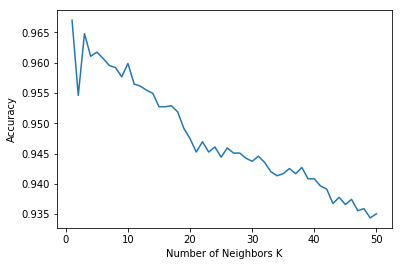

In [452]:
import matplotlib.pyplot as plt
MSE = [1 - xtest1 for xtest1 in cv_scores_f1]
optimal_k = range(1,51)[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d" % optimal_k)

# allow plots to appear within the notebook
%matplotlib inline

plt.plot(range(1,51), cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.show()


In [126]:
as we can see the optimum value of k = 1 gives the highest accuracy, hence using k = 1 as the best k value

In [456]:
#Retraining the model and evaluating the performance of the training using the optimal k value
X_testdf = pd.read_csv('test\X_test.txt', delim_whitespace=True, header = None)
Y_testdf = pd.read_csv('test\y_test.txt', header = None, delim_whitespace=True)

from sklearn.cross_validation import train_test_split

print(ytest1.shape)

x_test = np.array(X_testdf)
y_test = np.array(Y_testdf[0])

Xtrain2, Xtest2, ytrain2, ytest2 = train_test_split(x_test,y_test, test_size=0.2)

(1471,)


In [457]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xtrain2, ytrain2)
ypred2 = knn.predict(Xtest2)

Confusion = confusion_matrix(ytest2,ypred2)
print ('Confusion matrix')
print(Confusion)
print('F1_Score Average')
print(classification_report(ytest2,ypred2))
print('Accuracy')
print(metrics.accuracy_score(ytest2, ypred2))

Confusion matrix
[[ 95   0   0   0   0   0]
 [  0  79   0   0   0   0]
 [  2   0  82   0   0   0]
 [  0   0   0  81   7   0]
 [  0   0   0   7 113   0]
 [  0   0   0   0   0 124]]
F1_Score Average
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        95
          2       1.00      1.00      1.00        79
          3       1.00      0.98      0.99        84
          4       0.92      0.92      0.92        88
          5       0.94      0.94      0.94       120
          6       1.00      1.00      1.00       124

avg / total       0.97      0.97      0.97       590

Accuracy
0.9728813559322034


In [ ]:
#Task C

In [321]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [339]:
#Buildiing an elasticnet model and finding the best alpha value and l1_ratio

alpha_val = [1e-4,3e-4,1e-3,3e-3, 1e-2,3e-2]
l1ratio =   [0,0.15,0.5,0.7,1]

values = dict(alpha = alpha_val, l1_ratio = l1ratio)
Xtrain3, Xtest3, ytrain3, ytest3 = train_test_split(x_train,y_train, test_size=0.2)
elasticnet = SGDClassifier(loss='log', penalty='elasticnet', max_iter=1000) 
bestvalues = GridSearchCV(elasticnet, values, cv = 10, scoring = 'f1_weighted')

In [453]:
elasticnet.fit(Xtrain3, ytrain3)
bestvalues.fit(Xtrain3, ytrain3)
y_predict = elasticnet.predict(Xtest3)

In [442]:
elasticnet_acc = accuracy_score(y_predict, ytest3)
print("Accuracy: {}".format(elasticnet_acc))
l1best = bestvalues.best_params_['l1_ratio']
alphabest = bestvalues.best_params_['alpha']
print("Best l1 ratio is")
print(l1best)
print("Best Alpha value is")
print(alphabest)

Accuracy: 0.9490142760027193
Best l1 ratio is
0.5
Best Alpha value is
0.001


In [454]:
#retraining the train model to predict the label on test set

elasticnet1 = SGDClassifier(loss='log', penalty='elasticnet', alpha = alphabest, l1_ratio = l1best, max_iter = 1000)

#fit the model
elasticnet1.fit(Xtrain2,ytrain2)

#prediction
pred = elasticnet1.predict(Xtrain2)

#test prediction
pred1 = elasticnet1.predict(Xtest2)

In [443]:
#Accuracy
elasticnet1_acc = metrics.accuracy_score(ytrain2, pred)
print("Training accuracy : {}" .format(elasticnet1_acc))

#Accuracy
elasticnet2_acc = metrics.accuracy_score(ytest2,pred1)
print("Tetsting accuracy :{}".format(elasticnet2_acc))


#confusion metrics

elasticnet1_conf = metrics.confusion_matrix(ytest2,pred1)
print("Confusion Metrics is")
print(elasticnet1_conf)

#Classification report

elasticnet1_clas = metrics.classification_report(ytest2,pred1)
print("Classification Report is")
print(elasticnet1_clas)

Training accuracy : 0.986423419601188
Tetsting accuracy :0.9847457627118644
Confusion Metrics is
[[ 92   0   0   0   0   0]
 [  0  84   0   0   0   0]
 [  2   1  83   0   0   0]
 [  0   1   0  90   0   0]
 [  0   0   0   5 110   0]
 [  0   0   0   0   0 122]]
Classification Report is
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        92
          2       0.98      1.00      0.99        84
          3       1.00      0.97      0.98        86
          4       0.95      0.99      0.97        91
          5       1.00      0.96      0.98       115
          6       1.00      1.00      1.00       122

avg / total       0.99      0.98      0.98       590



In [ ]:
#Task D

In [368]:
from sklearn import svm
from sklearn.grid_search import GridSearchCV

In [369]:
#building the SVM model with rbf Kernel and finding the best gamma value and c value
gamma_value =  [1e-3, 1e-4]
c_value = [1,10,100,1000]

values1 = dict(gamma = gamma_value, C = c_value)
SVM_a = svm.SVC(kernel = 'rbf')
SVM_Score = GridSearchCV(SVM_a, values1, cv = 10, scoring = 'f1_weighted')

In [370]:
SVM_Score.fit(Xtrain3, ytrain3)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'gamma': [0.001, 0.0001], 'C': [1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_weighted',
       verbose=0)

In [371]:
best_gamma = SVM_Score.best_params_['gamma']
best_c_value = SVM_Score.best_params_['C']

print('Best Gamma value :')
print(best_gamma)
print('Best C Value :')
print(best_c_value)

Best Gamma value :
0.001
Best C Value :
1000


In [455]:
#retraining the train model to predict the label on test set

SVM_retrain = svm.SVC(kernel = 'rbf', gamma = best_gamma, C = best_c_value)

#fit the model
SVM_retrain.fit(Xtrain2,ytrain2)

#prediction
pred_SVM = SVM_retrain.predict(Xtrain2)

#test prediction
pred_SVM_test = SVM_retrain.predict(Xtest2)

In [444]:
#Accuracy
SVM_retrain_acc = metrics.accuracy_score(ytrain2, pred_SVM)
print("Training accuracy : {}" .format(SVM_retrain_acc))

#Accuracy
pred_SVM_test_acc = metrics.accuracy_score(ytest2,pred_SVM_test)
print("Tetsting accuracy :{}".format(pred_SVM_test_acc))

#confusion metrics

SVM_conf = metrics.confusion_matrix(ytest2,pred_SVM_test)
print("Confusion Metrics is")
print(SVM_conf)

#Classification report

SVM_clas = metrics.classification_report(ytest2,pred_SVM_test)
print("Classification Report is")
print(SVM_clas)

Training accuracy : 1.0
Tetsting accuracy :0.988135593220339
Confusion Metrics is
[[ 92   0   0   0   0   0]
 [  0  84   0   0   0   0]
 [  0   0  86   0   0   0]
 [  0   0   0  89   2   0]
 [  0   0   0   5 110   0]
 [  0   0   0   0   0 122]]
Classification Report is
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        92
          2       1.00      1.00      1.00        84
          3       1.00      1.00      1.00        86
          4       0.95      0.98      0.96        91
          5       0.98      0.96      0.97       115
          6       1.00      1.00      1.00       122

avg / total       0.99      0.99      0.99       590



In [ ]:
#Task E

In [374]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

In [422]:
#Building the Rndom forest classifier for and finding the best depth and estimators

depth =  [300,500,600]
n_trees = [200,500,700]

values_rf = dict(n_estimators = n_trees, max_depth = depth)
random_forest = RandomForestClassifier()
rf_score = GridSearchCV(random_forest, values_rf, cv = 10, scoring = 'f1_micro')

In [423]:
rf_score.fit(Xtrain3, ytrain3)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500, 700], 'max_depth': [300, 500, 600]},
       pre_dispatch='2*n_jobs', refit=True, scoring='f1_micro', verbose=0)

In [424]:
best_depth = rf_score.best_params_['max_depth']
best_trees = rf_score.best_params_['n_estimators']

print('Best depth of trees :')
print(best_depth)
print('Best number of trees :')
print(best_trees)

Best depth of trees :
500
Best number of trees :
500


In [440]:
#retraining the train model to predict the label on test set

rf_retrain = RandomForestClassifier(n_estimators=best_trees, max_depth=best_depth)

#fit the model
rf_retrain.fit(Xtrain2,ytrain2)

#train prediction
pred_rf = rf_retrain.predict(Xtrain2)

#test prediction
pred_rf_test = rf_retrain.predict(Xtest2)



In [445]:
#Accuracy
rf_retrain_acc = metrics.accuracy_score(ytrain2, pred_rf)
print("Training accuracy : {}" .format(rf_retrain_acc))

#Accuracy
pred_rf_test_acc = metrics.accuracy_score(ytest2,pred_rf_test)
print("Testing accuracy :{}".format(pred_rf_test_acc))

#confusion metrics

rf_conf = metrics.confusion_matrix(ytest2,pred_rf_test)
print("Confusion Metrics is")
print(rf_conf)

#Classification report

rf_clas = metrics.classification_report(ytest2,pred_rf_test)
print("")
print("Classification Report is")
print(rf_clas)


Training accuracy : 1.0
Testing accuracy :0.9796610169491525
Confusion Metrics is
[[ 92   0   0   0   0   0]
 [  0  84   0   0   0   0]
 [  2   2  82   0   0   0]
 [  0   0   0  87   4   0]
 [  0   0   0   4 111   0]
 [  0   0   0   0   0 122]]

Classification Report is
             precision    recall  f1-score   support

          1       0.98      1.00      0.99        92
          2       0.98      1.00      0.99        84
          3       1.00      0.95      0.98        86
          4       0.96      0.96      0.96        91
          5       0.97      0.97      0.97       115
          6       1.00      1.00      1.00       122

avg / total       0.98      0.98      0.98       590



In [ ]:
#Task A

Objective of data collection process
Objective of data collection is to understand human behaviour and their daily activities using the waist mounted sensors.
The current data is collected to analyse the daily activities that a normal human performs using the latest technology 
i.e. smartphones. 

Human activity types
There were 6 different activities performed by individuals, they are Standing, sitting, standing, Laying down, sitting down 
and laying down. There are totally 3 human activities performed in a specific manner where all the activities are repeated twice
The activities are Standing, Sitting and Laying Down. These activities were performed by a group of 30 individuals.

Instances
Totally there are 70% of the instances available in test data set and 30% of the instances are available in train data set. 
Totally extracted features were 561 to represent each instance. There are multiple features extracted 

Features
The multiple features extracted are from the accelerometer and gyroscope, there are two main features, they are related to body
and gravity. Basically the features extracted are denoted in a specific format. Features are Magnitue, Jerk and Acceleration 
are obtaied. 

SVM Model was used in order to recognise the activities performed. This model provided 96% accuracy. It is trained by exploiting
binary classifiers of SVM, are generalized into multiclass case using OVA(one versus all) approach. The hyperparameters for SVM 
are selected through 10-fold-cross validatioin, the gaussian kernels are used in the experiments.




In [ ]:
#Task F
The classification method which achieved the best result is SVM, the reason is that we got an accuracy of 98.81% which
is greater than all other models' classification after finding the best parameters from the data provided. 
K means classification performed the worst, we could get the accuracy score of 97.28% which is the lowest of all.
I could do better than the results in paper as we can get more accurate data in the current world with the improved technology.
To get more accurate data it is required to gather information or perfom tests on many more subjects and the test should be 
performed freely and not in the laboratory conditions. To further improve the model performances we will need to perform testing
and train the model with more data. Finding more accurate alpha values, l1 ratio etc will lead the model to perform more 
accurately. 